In [1]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
import random

In [44]:
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


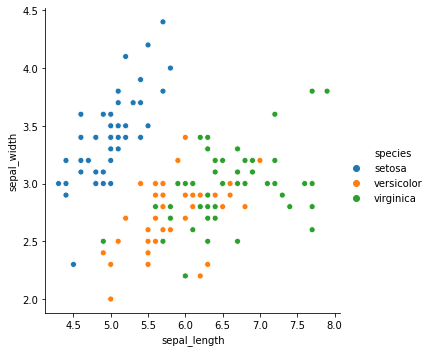

In [45]:
sns.relplot(x='sepal_length',y='sepal_width',hue='species',data=iris)

In [46]:
from sklearn.preprocessing import StandardScaler

features = ['sepal_length','sepal_width','petal_length','petal_width']
x = iris.loc[:,features].values
y = iris.loc[:,['species']].values
x = StandardScaler().fit_transform(x)


In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns =['pc1','pc2','pc3'])

In [48]:
finalDf = pd.concat([principalDf, iris['species']],axis =1)
print(finalDf.head(4))
print('*'*30)
print(pca.explained_variance_ratio_)
print('*'*30)
print(sum(pca.explained_variance_ratio_))

        pc1       pc2       pc3 species
0 -2.264703  0.480027 -0.127706  setosa
1 -2.080961 -0.674134 -0.234609  setosa
2 -2.364229 -0.341908  0.044201  setosa
3 -2.299384 -0.597395  0.091290  setosa
******************************
[0.72962445 0.22850762 0.03668922]
******************************
0.9948212908928451


KeyError: 'principal component 1'

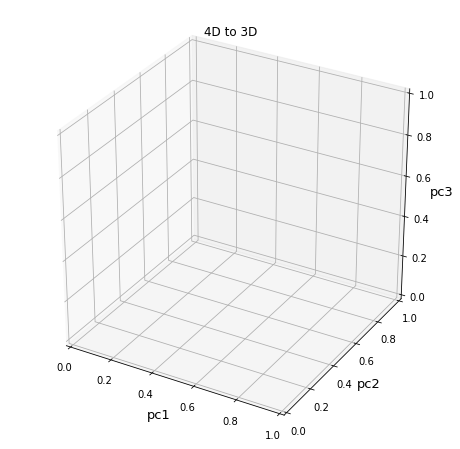

In [52]:
# 3D plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('pc1',fontsize=13)
ax.set_ylabel('pc2',fontsize=13)
ax.set_zlabel('pc3',fontsize=13)
ax.set_title('4D to 3D')

targets = ['etosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()
